# Работа со строковыми значениями

In [3]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import nltk

## Лабораторная работа 6

### Форматирование строк

1\. Загрузите данные из файла `recipes_sample.csv` (__ЛР2__) в виде `pd.DataFrame` `recipes` При помощи форматирования строк выведите информацию об id рецепта и времени выполнения 5 случайных рецептов в виде таблицы следующего вида:

    
    |      id      |  minutes  |
    |--------------------------|
    |    61178     |    65     |
    |    202352    |    80     |
    |    364322    |    150    |
    |    26177     |    20     |
    |    224785    |    35     |
    
Обратите внимание, что ширина столбцов заранее неизвестна и должна рассчитываться динамически, в зависимости от тех данных, которые были выбраны. 

In [84]:
recipes = pd.read_csv("recipes_sample.csv")

np.random.seed(123)
random_recipes = recipes.sample(5)

output = f"|{'id': ^9}|{'minutes': ^9}|\n|{'-'*9}|{'-'*9}|\n"

for index, row in random_recipes.iterrows():
    output += f"|{row['id']:^9}|{row['minutes']: ^9}|\n"

print(output)

|   id    | minutes |
|---------|---------|
| 347055  |   20    |
|  24370  |   90    |
| 117467  |   80    |
|  10487  |   65    |
| 219968  |   260   |



2\. Напишите функцию `show_info`, которая по данным о рецепте создает строку (в смысле объекта python) с описанием следующего вида:

```
"Название Из Нескольких Слов"

1. Шаг 1
2. Шаг 2
----------
Автор: contributor_id
Среднее время приготовления: minutes минут
```

    
Данные для создания строки получите из файлов `recipes_sample.csv` (__ЛР2__) и `steps_sample.xml` (__ЛР3__). 
Вызовите данную функцию для рецепта с id `170895` и выведите (через `print`) полученную строку на экран.

In [55]:
with open("steps_sample.xml", 'r') as fp:
    xml_ = BeautifulSoup(fp, 'xml')

In [192]:
def show_info(xml_, df_, id_):
    for recipe in xml_.find_all('recipe'):
        if int(recipe.id.text) == int(id_):
            steps = [step.text for step in recipe.find_all('step')]
            break
    
    recipe_info = recipes[recipes['id'] == int(id_)].iloc[0]
    recipe_name = recipe_info['name']
    contributor_id = recipe_info['contributor_id']
    minutes = recipe_info['minutes']
    
    output = f'{recipe_name}\n\n'
    
    for ind_, step_ in enumerate(steps):
        output += f'{ind_ + 1}. {step_}\n'

    output += f'----------\nАвтор: {contributor_id}\nСреднее время приготовления: {minutes} минут'
    return output

In [193]:
print(show_info(xml_, recipes, 170895))

leeks and parsnips  sauteed or creamed

1. clean the leeks and discard the dark green portions
2. cut the leeks lengthwise then into one-inch pieces
3. melt the butter in a medium skillet , med
4. heat
5. add the garlic and fry 'til fragrant
6. add leeks and fry until the leeks are tender , about 6-minutes
7. meanwhile , peel and chunk the parsnips into one-inch pieces
8. place in a steaming basket and steam 'til they are as tender as you prefer
9. i like them fork-tender
10. drain parsnips and add to the skillet with the leeks
11. add salt and pepper
12. gently sautee together for 5-minutes
13. at this point you can serve it , or continue on and cream it:
14. in a jar with a screw top , add the half-n-half and arrowroot
15. shake 'til blended
16. turn heat to low under the leeks and parsnips
17. pour in the arrowroot mixture , stirring gently as you pour
18. if too thick , gradually add the water
19. let simmer for a couple of minutes
20. taste to adjust seasoning , probably an additi

## Работа с регулярными выражениями

3\. Напишите регулярное выражение, которое ищет следующий паттерн в строке: число (1 цифра или более), затем пробел, затем слова: hour или hours или minute или minutes. Произведите поиск по данному регулярному выражению в каждом шаге рецепта с id 25082. Выведите на экран все непустые результаты, найденные по данному шаблону.

In [201]:
pattern = r'\d+\s(?:hour|hours|minute|minutes)'

In [210]:
id_ = 25082
output = ''

for recipe in xml_.find_all('recipe'):
        if int(recipe.id.text) == int(id_):
            for step in recipe.find_all('step'):
                matches = re.findall(pattern, step.text)
                
                if matches:
                    output += f'Строка: {step.text}\n'
                    
                    for match in matches:
                        output += (f'Результат: {match}\n')
                    
                    output += f'{"-" * 10}\n'
            
            break

print(output)

Строка: turn out onto a lightly floured board and knead for about 20 minutes , adding flour as nescessary to keep the dough from sticking to the board
Результат: 20 minute
----------
Строка: when it has been sufficiently kneaded , cover it with a damp cloth for about 10 minutes and wash and grease the bowl lightly
Результат: 10 minute
----------
Строка: let the dough rise until it springs back when you stick your finger in it , and it is about twice the size as it was before (this takes about 2 hours
Результат: 2 hour
----------
Строка: when the dough has risen twice , deflate it again and cover it with the damp cloth again for about 10 minutes , then divide it into and shape it into loaves , buns , etc
Результат: 10 minute
----------
Строка: bake at 400 for 20 minutes , and then turn the oven down to 350 and bake for 20-30 minutes longer , until the loaf is a lovely brown and sounds hollow when you thump it on the bottom
Результат: 20 minute
Результат: 30 minute
----------



4\. Напишите регулярное выражение, которое ищет шаблон вида "this..., but" _в начале строки_ . Между словом "this" и частью ", but" может находиться произвольное число букв, цифр, знаков подчеркивания и пробелов. Никаких других символов вместо многоточия быть не может. Пробел между запятой и словом "but" может присутствовать или отсутствовать.

Используя строковые методы `pd.Series`, выясните, для каких рецептов данный шаблон содержится в тексте описания. Выведите на экран количество таких рецептов и 3 примера подходящих описаний (текст описания должен быть виден на экране полностью).

In [35]:
reg_expr = r'^this\b[\w\s]*,\s?but'

In [51]:
description_ = recipes["description"]
description_ = description_.fillna("")

matches = description_.str.contains(reg_expr)

print(f"Кол-во подходящих описаний: {matches.sum()}")
print("\nПримеры описаний:")
for example in description_[matches].head(3):
    print(f"\n{example}")

Кол-во подходящих описаний: 134

Примеры описаний:

this is a great meal eaten the same day ,but even better the next day , if you can wait! add your favourite spices, but try it first as it is and i think that you will enjoy the 'vegetable' taste. good for freezing.

this was adapted from a recipe i found on the net, but i added julienne onion to the peppers.  this is a meal in itself, or you could have a small slice with a meat dish.  for those that like to have brunch, it's a bit different to your traditional quiche recipes.  if you love cheese, you could add 1/2 cup of your favorite to the egg mixture, then pour over peppers.

this is kind of similar to some of the other versions out there, but it is the best and easiest i have found


5\. В текстах шагов рецептов обыкновенные дроби имеют вид "a / b". Используя регулярные выражения, уберите в тексте шагов рецепта с id 72367 пробелы до и после символа дроби. Выведите на экран шаги этого рецепта после их изменения.

In [153]:
id_ = 72367


for recipe in xml_.find_all('recipe'):
    if int(recipe.id.text) == int(id_):
        steps = [re.sub(r'\s*/\s*', '/', step.text) for step in recipe.find_all('step')]
        break


print("Шаги рецепта после удаления пробелов до и после символов дробей:")
for step in steps:
    print(step)
    print("-" * 50)

Шаги рецепта после удаления пробелов до и после символов дробей:
mix butter , flour , 1/3 c
--------------------------------------------------
sugar and 1-1/4 t
--------------------------------------------------
vanilla
--------------------------------------------------
press into greased 9" springform pan
--------------------------------------------------
mix cream cheese , 1/4 c
--------------------------------------------------
sugar , eggs and 1/2 t
--------------------------------------------------
vanilla beating until fluffy
--------------------------------------------------
pour over dough
--------------------------------------------------
combine apples , 1/3 c
--------------------------------------------------
sugar and cinnamon
--------------------------------------------------
arrange on top of cream cheese mixture and sprinkle with almonds
--------------------------------------------------
bake at 350 for 45-55 minutes , or until tester comes out clean
--------------------

### Сегментация текста

6\. Разбейте тексты шагов рецептов на слова при помощи пакета `nltk`. Посчитайте и выведите на экран кол-во уникальных слов среди всех рецептов. Словом называется любая последовательность алфавитных символов (для проверки можно воспользоваться `str.isalpha`). При подсчете количества уникальных слов не учитывайте регистр.

In [60]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\Alice
[nltk_data]     Klimovich\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [71]:
# Извлекаем тексты шагов рецептов из XML
steps_texts = [step.text for step in xml_.find_all("step")]

# Объединяем все тексты шагов рецептов в одну строку
all_steps_text = " ".join(steps_texts)

# Токенизируем текст на слова, игнорируя знаки пунктуации
words = [word.lower() for word in word_tokenize(all_steps_text) if word.isalpha()]

# Считаем количество уникальных слов
unique_words = set(words)
num_unique_words = len(unique_words)

print(f"Кол-во уникальных слов среди всех рецептов: {num_unique_words}")

Кол-во уникальных слов среди всех рецептов: 14926


7\. Разбейте описания рецептов из `recipes` на предложения при помощи пакета `nltk`. Найдите 5 самых длинных описаний (по количеству _предложений_) рецептов в датасете и выведите строки фрейма, соответствующие этим рецептами, в порядке убывания длины.

In [72]:
from nltk.tokenize import sent_tokenize

In [85]:
recipes["description"] = recipes["description"].astype(str)

# Создаем новый столбец с кол-вом предложений в описании каждого рецепта
recipes["num_sentences"] = recipes["description"].apply(sent_tokenize).apply(len)

# Находим 5 самых длинных описаний по кол-ву предложений
top_5_longest_indexes = recipes["num_sentences"].nlargest(5).index

recipes.loc[top_5_longest_indexes]

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,num_sentences
18408,my favorite buttercream icing for decorating,334113,30,681465,2008-10-30,12.0,this wonderful icing is used for icing cakes a...,NaN,76
481,alligator claws avocado fritters with chipot...,287008,45,765354,2008-02-19,NaN,a translucent golden-brown crust allows the gr...,9.0,27
22566,rich barley mushroom soup,328708,60,221776,2008-10-03,NaN,this is one of the best soups i've ever made a...,10.0,24
6779,chocolate tea,205348,6,428824,2007-01-14,NaN,i wrote this because there are an astounding l...,NaN,23
16296,little bunny foo foo cake carrot cake with c...,316000,68,689540,2008-07-27,14.0,the first time i made this cake i grated a mil...,NaN,23


8\. Напишите функцию, которая для заданного предложения выводит информацию о частях речи слов, входящих в предложение, в следующем виде:
```
PRP   VBD   DT      NNS     CC   VBD      NNS        RB   
 I  omitted the raspberries and added strawberries instead
``` 
Для определения части речи слова можно воспользоваться `nltk.pos_tag`.

Проверьте работоспособность функции на названии рецепта с id 241106.

Обратите внимание, что часть речи должна находиться ровно посередине над соотвествующим словом, а между самими словами должен быть ровно один пробел.


In [92]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alice Klimovich\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [172]:
def print_pos_tag(sentence):
    # Токенизация предложения
    tokens = word_tokenize(sentence)
    
    # Получение частей речи для каждого слова
    tagged = pos_tag(tokens)
    
    # Подготовка строк для вывода
    tags_line = ""
    words_line = ""
    
    # Формирование строк для вывода
    for word, tag in tagged:
        if word.isalpha():
            # Форматирование части речи и слова
            formatted_tag = tag.center(len(word)) + " "
            formatted_word = word.center(len(tag)) + " "
            
            # Добавление в строку частей речи
            tags_line += formatted_tag
            
            # Добавление в строку слов с одним пробелом между ними
            words_line += formatted_word
    
    # Вывод результатов
    print(tags_line)
    print(words_line)

In [173]:
sentence_ = recipes[recipes['id'] == 241106]['description'].iloc[0]
print_pos_tag(sentence_)

  DT  VBP DT   RB    JJ    NN   NN  TO  VB  IN  DT     NN     WRB    JJ   NNS  VBP    JJ     NN     CC   NNS     VBG   IN  DT   VBG    VBN  VBZ DT     NN      CC   EX  VBP     RB     JJ  JJR  NNS  TO   VB   DT   NN    VB   IN  IN   DT    JJ     NNS    CC  RB   VB  IN   WP   VBZ    JJ  TO PRP 
these are a  really good quick meal to make in the summertime when local farms have fresh eggplant and tomatoes coming in the topping given  is a  suggestion but there are certainly many more ways to enjoy this dish start out with the eggplant steaks and then top with what sounds good to you 


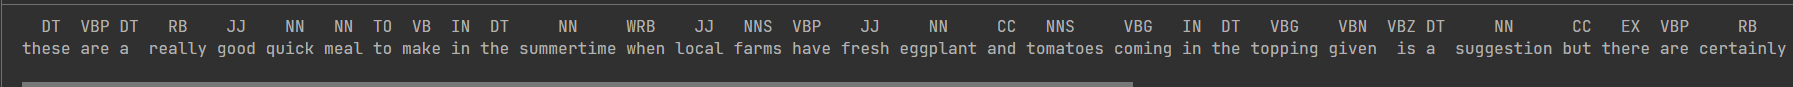